In [1]:
import Pkg
using DifferentialEquations

In [52]:
# задаём описание модели с начальными условиями:
a = 0.98
f(u,p,t) = a*u
u0 = 1.0

# задаём интервал времени:
tspan = (0.0,1.0)

# решение:
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.3521860297865888
 0.6934436122197829
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908713484919
 1.9730384457359198
 2.6644561424814266

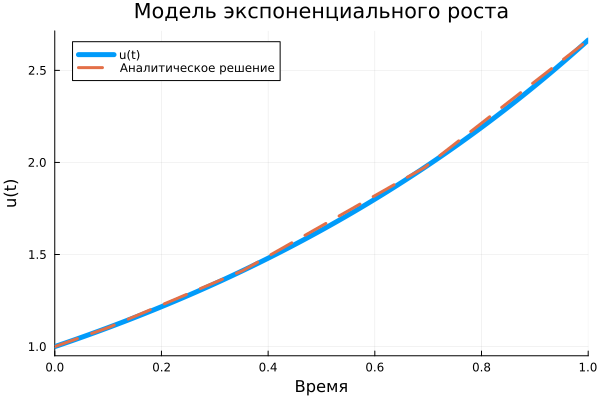

In [53]:
using Plots

# строим графики:
plot(sol, linewidth=5,title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="u(t)")

plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,label="Аналитическое решение")

ODESolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, Nothing, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Nothing, @NamedTuple{}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{0, Tuple{Tsit5{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, Vern7{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, Rosenbrock23{0, AutoFiniteDiff{Val{:forward}, Val{:forward}, Val{:hcentral}, Nothing, Nothing, Int64}, Nothing, typeof(OrdinaryDiffEqCore.DEFAULT_PRECS), Val{:forward}(), true, nothing, typeof(OrdinaryDiffEqCore.tr

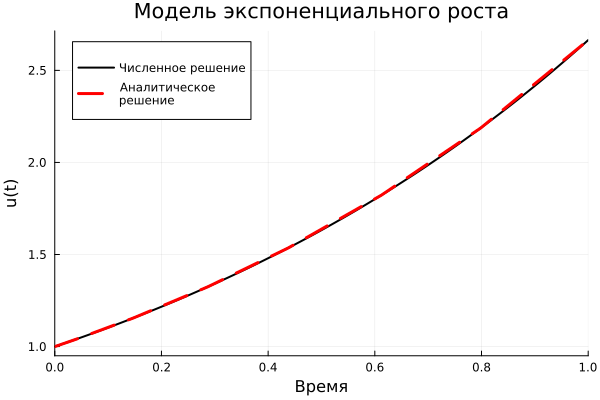

In [54]:
# задаём точность решения:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
println(sol)
# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста",
xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t,
t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое
решение")

In [55]:
# задаём точность решения:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
println(sol)

# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое решение")

# задаём описание модели:
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

# задаём начальное условие:
u0 = [1.0,0.0,0.0]

# задаём знанчения параметров:
p = (10,28,8/3)

# задаём интервал времени:
tspan = (0.0,100.0)

# решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

ODESolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, Nothing, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Nothing, @NamedTuple{}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{0, Tuple{Tsit5{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, Vern7{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}, Rosenbrock23{0, AutoFiniteDiff{Val{:forward}, Val{:forward}, Val{:hcentral}, Nothing, Nothing, Int64}, Nothing, typeof(OrdinaryDiffEqCore.DEFAULT_PRECS), Val{:forward}(), true, nothing, typeof(OrdinaryDiffEqCore.tr

retcode: Success
Interpolation: 3rd order Hermite
t: 1325-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262407732952926
   0.009058075632950364
   0.01695646917889552
   0.027689958632766257
   0.04185634991045167
   0.06024041181372633
   0.08368541086439041
   0.1133649935351149
   0.14862181354556042
   0.18703978268945023
   ⋮
  99.30387481074725
  99.35991394949355
  99.42468405668066
  99.49018875318062
  99.54862803586417
  99.6145902246956
  99.6844772275333
  99.76689729728005
  99.85118113701569
  99.9277902563632
  99.99633045999587
 100.0
u: 1325-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591636090403, 0.08977060609621872, 0.0001438018323641714]
 [0.9242043615200224, 0.24228912476918024, 0.001046162329727883]
 [0.8800455859164964, 0.4387364554855289, 0.003424259429099474]
 [0.848330984

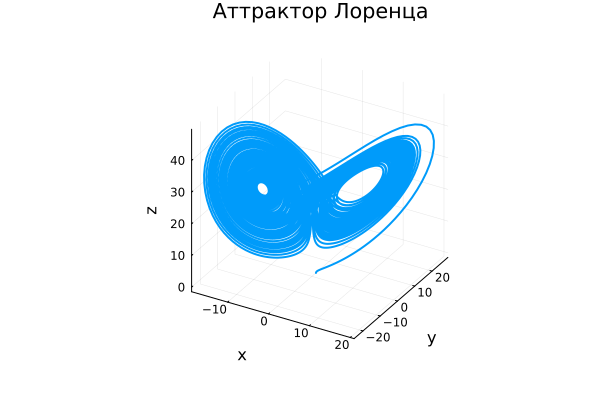

In [9]:
# строим график:
plot(sol, vars=(1,2,3), lw=2, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

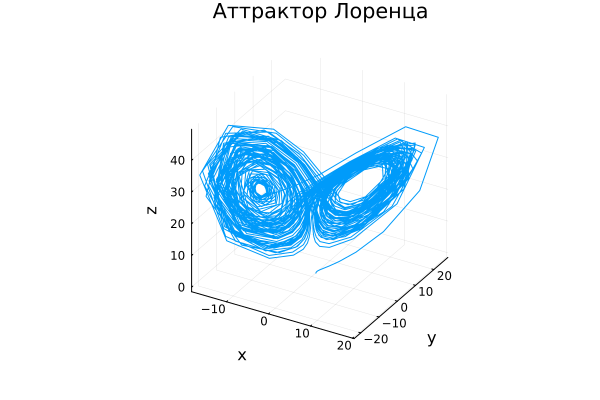

In [10]:
# отключаем интерполяцию:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца",
xaxis="x",yaxis="y", zaxis="z",legend=false)

In [19]:
Pkg.add("ParameterizedFunctions")
using ParameterizedFunctions, DifferentialEquations, Plots;

   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`


┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/KTR1R/src/utils.jl:121


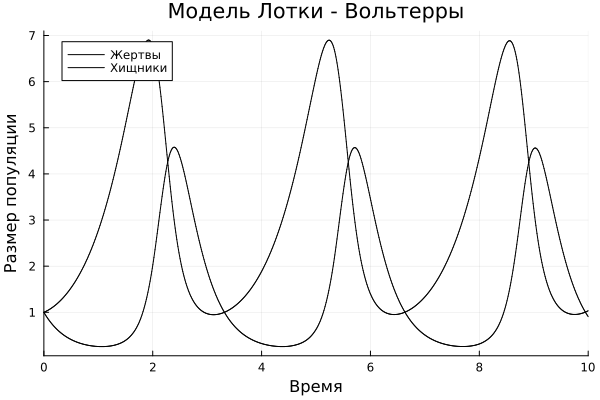

In [21]:
# задаём описание модели:
lv! = @ode_def LotkaVolterra begin
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
end a b c d

# задаём начальное условие:
u0 = [1.0,1.0]
# задаём знанчения параметров:
p = (1.5,1.0,3.0,1.0)
# задаём интервал времени:
tspan = (0.0,10.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid
        :dash], title="Модель Лотки - Вольтерры", xaxis="Время",yaxis="Размер популяции")

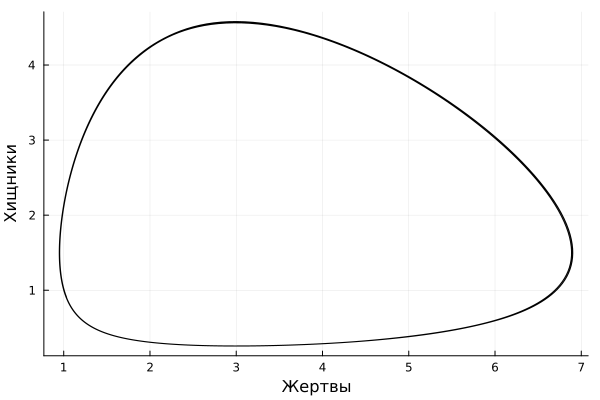

In [18]:
# фазовый портрет:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники",
legend=false)

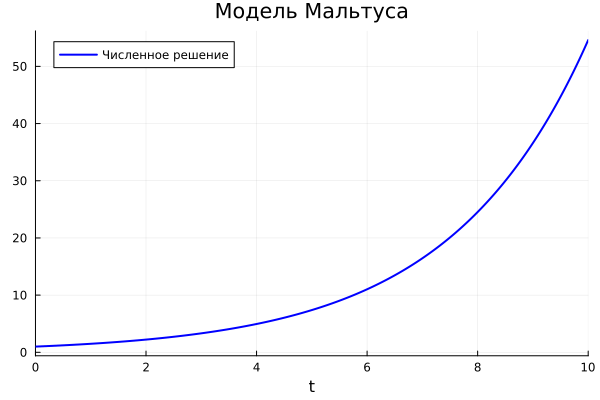

In [23]:
f(u, p, t) = a * u
b = 0.5
c = 0.1
a = b - c
u0 = 1.0
tspan = (0.0, 10.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob)
plot(sol, title="Модель Мальтуса", label="Численное решение", color="blue", linewidth=2)

[ Info: Saved animation to /home/sc24/rudn/2026-1--study--computer-practice/labs/lab6/maltus.gif


Plots.AnimatedGif("/home/sc24/rudn/2026-1--study--computer-practice/labs/lab6/maltus.gif")
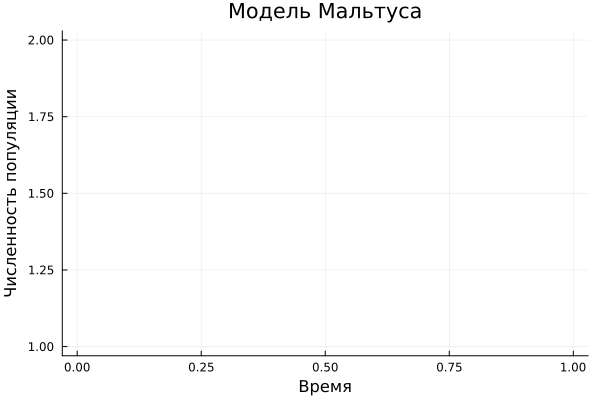

In [24]:
anim = @animate for i in 1:length(sol.t)
    plot(sol.t[1:i], sol.u[1:i], linewidth=2, title="Модель Мальтуса", xlabel="Время", ylabel="Численность популяции", legend=false, color="blue")
end
gif(anim, "maltus.gif", fps=15)

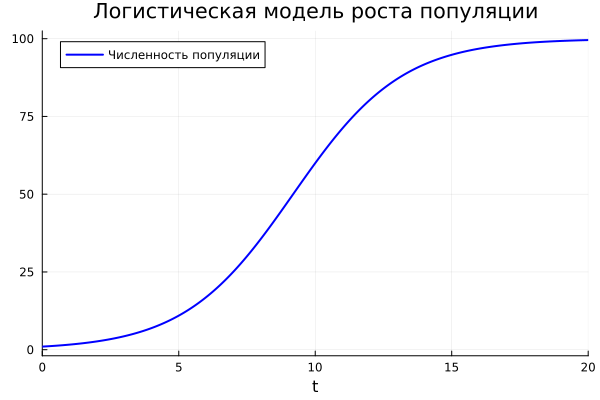

In [25]:
f(u, p, t) = r * u * (1 - u/k)
r = 0.5
k = 100
u0 = 1.0
tspan = (0.0, 20.0)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob)
plot(sol, title="Логистическая модель роста популяции", label="Численность популяции", color="blue", linewidth=2)

[ Info: Saved animation to /home/sc24/rudn/2026-1--study--computer-practice/labs/lab6/logistic.gif


Plots.AnimatedGif("/home/sc24/rudn/2026-1--study--computer-practice/labs/lab6/logistic.gif")
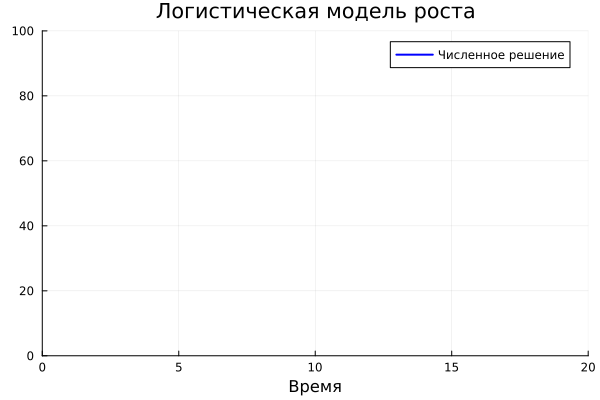

In [28]:
anim = @animate for t in 0:0.5:20
    plot(sol.t[sol.t .<= t], sol.u[sol.t .<= t], label="Численное решение", xlim=(0,20), ylim=(0,k), lw=2, color="blue", title="Логистическая модель роста", xlabel="Время")
end
gif(anim, "logistic.gif", fps=10)

In [33]:
function sir(u, p, t)
    beta, v = p
    s, i, r = u
    ds = -beta * s * i
    di = beta * s * i - v * i
    dr = v * i
    return [ds, di, dr]
end

sir (generic function with 1 method)

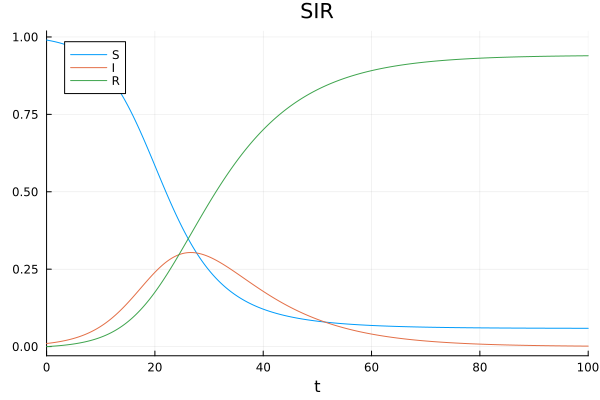

In [34]:
u0 = [0.99, 0.01, 0.0]
beta = 0.3
v = 0.1 
p = (beta, v)
tspan = (0.0, 100.0)
prob_sir = ODEProblem(sir, u0, tspan, p)
sol_sir = solve(prob_sir, Tsit5())
plot(sol_sir, title="SIR", label=["S" "I" "R"])

[ Info: Saved animation to /home/sc24/rudn/2026-1--study--computer-practice/labs/lab6/sir.gif


Plots.AnimatedGif("/home/sc24/rudn/2026-1--study--computer-practice/labs/lab6/sir.gif")
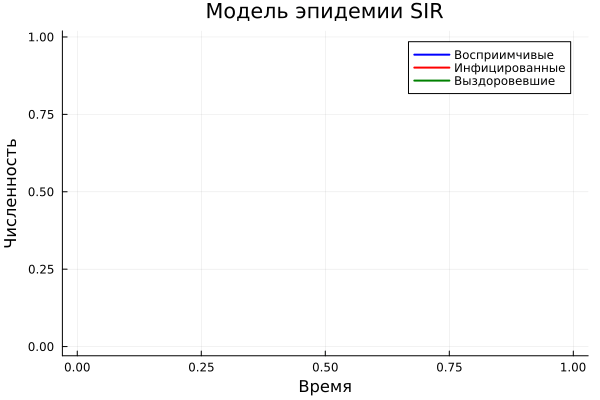

In [35]:
anim = @animate for t in 1:length(sol_sir.t)
    plot(sol_sir.t[1:t], [u[1] for u in sol_sir.u[1:t]], label="Восприимчивые", color=:blue, linewidth=2)
    plot!(sol_sir.t[1:t], [u[2] for u in sol_sir.u[1:t]], label="Инфицированные", color=:red, linewidth=2)
    plot!(sol_sir.t[1:t], [u[3] for u in sol_sir.u[1:t]], label="Выздоровевшие", color=:green, linewidth=2)
    title!("Модель эпидемии SIR")
    xlabel!("Время")
    ylabel!("Численность")
end
gif(anim, "sir.gif", fps=120)

In [36]:
function seir(u,p,t)
    (s,e,i,r) = u
    (beta, gamma, delta) = p
    N = s + e + i + r
    ds = -(beta * s * i) / N
    de = (beta * s * i) / N - delta * e
    di = delta * e - gamma * i
    dr = gamma * i
    return [ds, de, di, dr]
end

seir (generic function with 1 method)

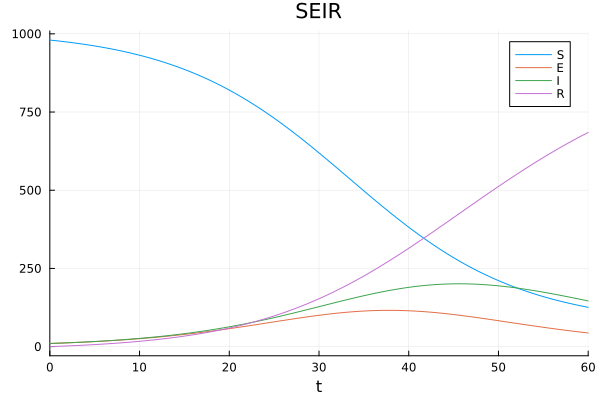

In [37]:
dt_ = 0.1
u0 = [980.0, 10.0, 10.0, 0.0]
p = [0.3, 0.1, 0.2]
tmax = 60.0
tspan = (0.0, tmax)
prob_1 = ODEProblem(seir, u0, tspan, p)
sol = solve(prob_1, dt = dt_)
plot(sol, title="SEIR", label=["S" "E" "I" "R"])


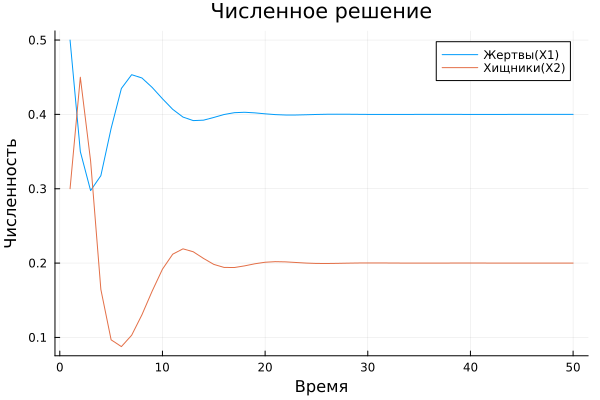

In [39]:
a = 2
c = 1
d = 5
X0 = [0.5, 0.3]
tspan = 50
X1 = zeros(tspan)
X2 = zeros(tspan)
X1[1] = X0[1]
X2[1] = X0[2]
for t in 1:tspan-1
    X1[t+1] = a * X1[t] * (1 - X1[t]) - X1[t] * X2[t]
    X2[t+1] = -c * X2[t] + d * X1[t] * X2[t]
end
plot(1:tspan, X1, label="Жертвы(Х1)", xlabel="Время", ylabel="Численность", title="Численное решение")
plot!(1:tspan, X2, label="Хищники(Х2)")


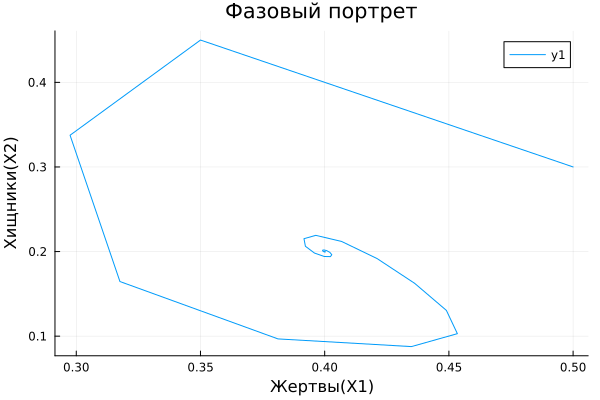

In [40]:
plot(X1, X2, xlabel="Жертвы(Х1)", ylabel="Хищники(Х2)", title="Фазовый портрет")

In [43]:
function competition(du, u, p, t)
    alpha, beta = p
    x, y = u
    du[1] = alpha * x - beta * x * y
    du[2] = alpha * y - beta * x * y
end

competition (generic function with 1 method)

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/TZ9Rx/src/integrator_interface.jl:626


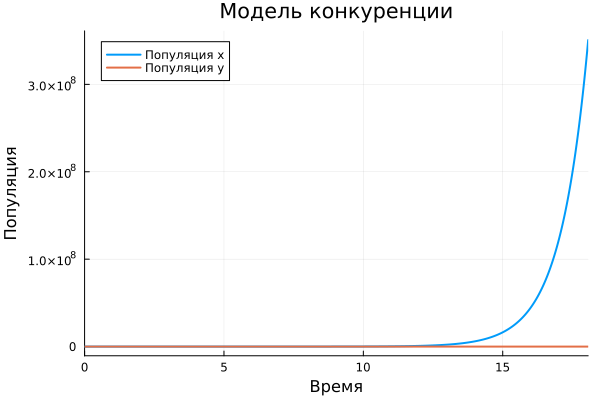

In [44]:
tspan = (0.0, 50.0)
u0 = [10.0, 5.0]
p = [1, 0.01]
prob = ODEProblem(competition, u0, tspan, p)
sol = solve(prob, Tsit5())
plot(sol, label=["Популяция х" "Популяция y"], title="Модель конкуренции", xlabel="Время", ylabel="Популяция", linewidth=2)

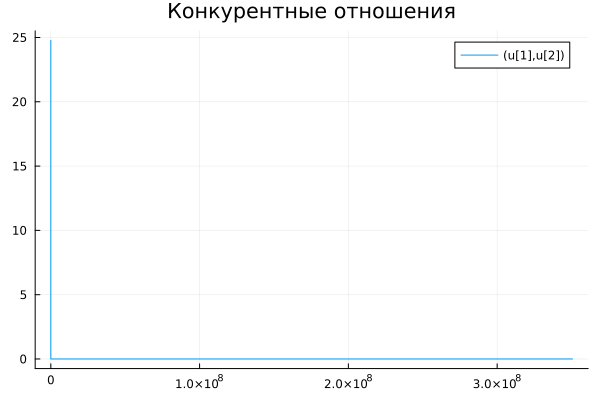

In [45]:
plot(sol, idxs=(1, 2), title="Конкурентные отношения")

In [46]:
function harmonic(u, p, t)
    x, y = u
    Y, omega = p
    dx = y
    dy = -2 * Y * y - omega^2 * x
    return [dx, dy]
end

harmonic (generic function with 1 method)

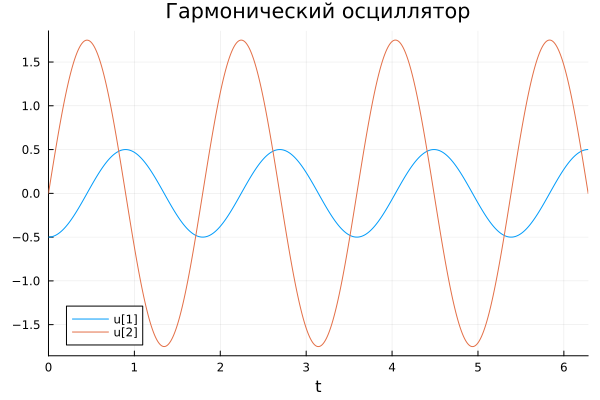

In [47]:
tspan = (0.0, 2*pi)
u0 = [-0.5, 0]
p = [0, 3.5]
prob = ODEProblem(harmonic, u0, tspan, p)
sol = solve(prob, Tsit5())
plot(sol, title="Гармонический осциллятор")

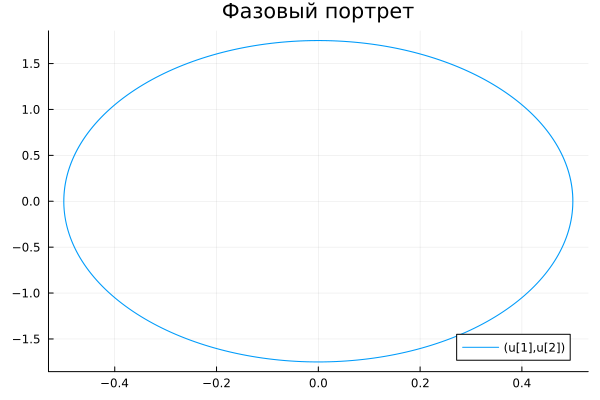

In [48]:
plot(sol, idxs=(1,2), title="Фазовый портрет")

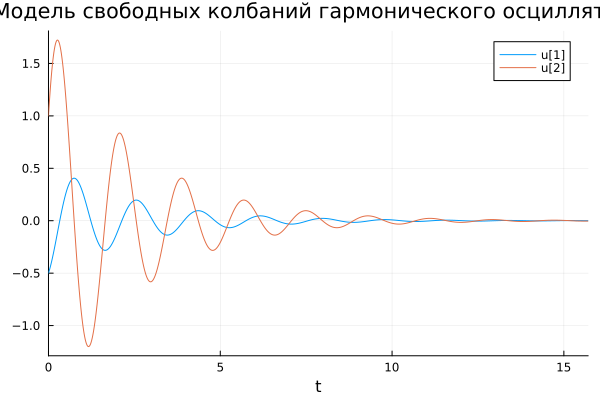

In [49]:
tspan = (0.0, 5 * pi)
u0 = [-0.5, 1]
p = [0.4, 3.5]
prob = ODEProblem(harmonic, u0, tspan, p)
sol = solve(prob, Tsit5())
plot(sol, title="Модель свободных колбаний гармонического осциллятора")

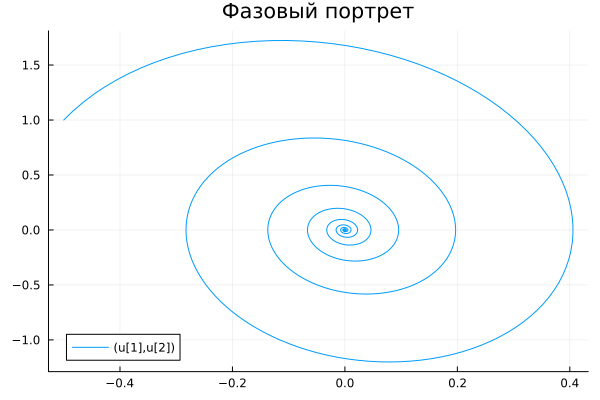

In [50]:
plot(sol, vars=(1,2), title="Фазовый портрет")